In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tokenizer = Tokenizer()

data = open('content.txt').read()
content = list(filter(None, data.lower().replace(".","\n").split("\n")))
content

tokenizer.fit_on_texts(content)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'of': 2, 'and': 3, 'in': 4, 'to': 5, 'a': 6, 'with': 7, 'is': 8, 'disease': 9, 'for': 10, 'as': 11, 'can': 12, 'may': 13, 'patients': 14, 'are': 15, 'be': 16, 'at': 17, 'flu': 18, 'risk': 19, 'insulin': 20, 'symptoms': 21, 'mps': 22, 'or': 23, 'complications': 24, 'that': 25, '1': 26, 'fabry': 27, 'i': 28, 'years': 29, 'an': 30, 'by': 31, 'rsv': 32, 'it': 33, 'related': 34, 'children': 35, 'diabetes': 36, 'this': 37, 'diagnosis': 38, 'from': 39, 'levels': 40, 'blood': 41, 'these': 42, 'which': 43, 'condition': 44, 'cells': 45, 'also': 46, 'increased': 47, 'more': 48, 'type': 49, 'glucose': 50, 'such': 51, 'common': 52, 'serious': 53, 'leading': 54, 'life': 55, 'other': 56, 'treatment': 57, 'attp': 58, 'pompe': 59, 'between': 60, 'some': 61, 'time': 62, 'result': 63, 'immune': 64, 'deficiency': 65, 'if': 66, 'age': 67, 'infants': 68, '3': 69, 'season': 70, 'before': 71, 'cause': 72, 'sugar': 73, 'system': 74, 'lead': 75, 'potentially': 76, 'respiratory': 77, 'enzyme': 78, 'co

In [ ]:
input_sequences = []
for line in content:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 240))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.0258 - loss: 6.5289
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.1060 - loss: 5.4386
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.2339 - loss: 4.1431
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.4246 - loss: 2.7763
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - accuracy: 0.6059 - loss: 1.7452
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.7733 - loss: 0.9990
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8616 - loss: 0.5970
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - accuracy: 0.9100 - loss: 0.3853
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9450 - loss: 0.2440
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - accuracy: 0.9371 - loss: 0.2232
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.9646 - loss: 0.1354
Epoch 12/100
96/96 ━━━━━━━━━━━

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

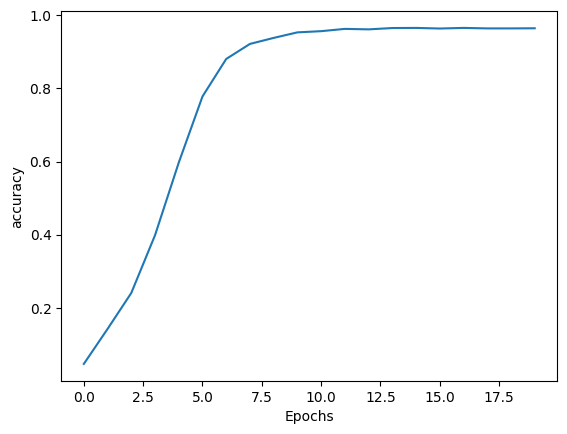

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "Patients with"
next_words = 50

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━